In [26]:
# Import libraires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## Q: Is there a correlation between daily rainfall vs river discharge ?
We want to understand how daily rainfall is related to river discharge.

In [27]:
# Load dataset
df_weather = pd.read_csv('concatenated_data1.csv') # Data obtained and amended from Ozlem

In [28]:
# First 5 rows of df_weather dataset
df_weather.head()

,index,datetime,name,tempmax_x,tempmin_x,temp,feelslikemax,feelslikemin,feelslike,dew,...,precipitation_sum,rain_sum,precipitation_hours,et0_fao_evapotranspiration,windspeed,temperature_2m_max,temperature_2m_min,apparent_temperature_max(°C),apparent_temperature_min(°C),windspeed_10m_max
0,0,17/8/23,barisal,34.0,27.3,30.0,45.0,31.4,36.7,25.8,...,2.8,2.8,9,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,1,16/8/23,barisal,34.3,27.1,30.2,45.2,30.6,37.4,26.1,...,18.3,18.3,16,3.37,NaN,NaN,NaN,NaN,NaN,NaN
2,2,15/8/23,barisal,33.6,26.9,29.6,43.8,30.0,35.8,25.6,...,15.3,15.3,14,3.11,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14/8/23,barisal,31.9,25.1,28.3,38.0,25.1,32.3,25.2,...,22.9,22.9,16,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4,13/8/23,barisal,28.3,25.6,26.8,35.0,25.6,29.4,25.6,...,15.4,15.4,18,1.84,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Summary of df_death dataset
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         38809 non-null  int64  
 1   datetime                      38809 non-null  object 
 2   name                          38809 non-null  object 
 3   tempmax_x                     38809 non-null  float64
 4   tempmin_x                     38809 non-null  float64
 5   temp                          38809 non-null  float64
 6   feelslikemax                  38809 non-null  float64
 7   feelslikemin                  38809 non-null  float64
 8   feelslike                     38809 non-null  float64
 9   dew                           38809 non-null  float64
 10  humidity                      38809 non-null  float64
 11  precip                        38809 non-null  float64
 12  precipprob                    38809 non-null  int64  
 13  p

In [30]:
# convert 'datetime' to datetime format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], format='%d/%m/%y')

In [31]:
# Check for duplicates based on 'datetime' and 'name'
duplicates = df_weather[df_weather.duplicated(subset=['datetime', 'name'], keep=False)]

# Print the number of duplicates
print(f'Number of duplicates: {len(duplicates)}')

Number of duplicates: 2856


In [32]:
# Remove duplicates 
df_weather = df_weather.drop_duplicates(subset=['datetime', 'name'], keep='first')

Now, we will look at the distribution of 'river_discharge' and 'precip'.

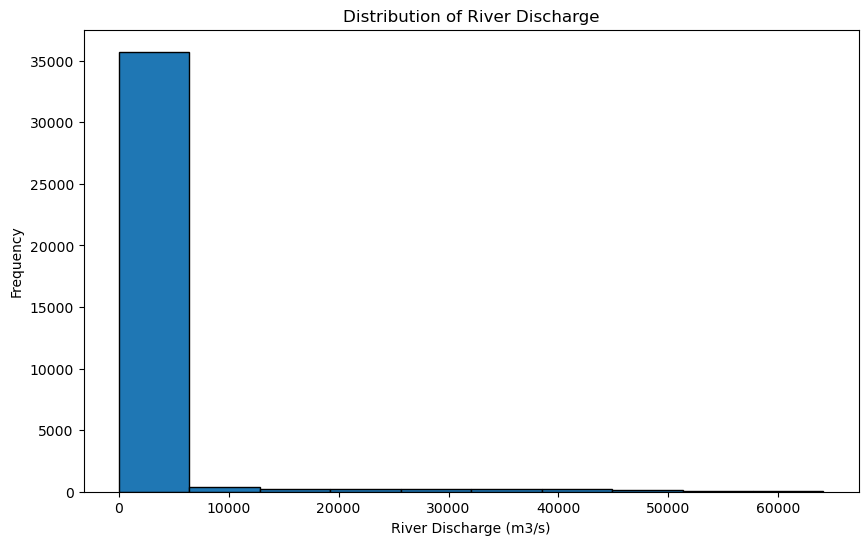

In [33]:
# Create a histogram for 'river_discharge'
plt.figure(figsize=(10, 6))
plt.hist(df_weather["river_discharge"], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('River Discharge (m3/s)')
plt.ylabel('Frequency')
plt.title('Distribution of River Discharge')

# Show the plot
plt.show()

In [34]:
# Filter data for each district
df_barisal = df_weather[df_weather['name'] == 'barisal']
df_bogra = df_weather[df_weather['name'] == 'bogra']
df_chittagong = df_weather[df_weather['name'] == 'chittagong']
df_comilla = df_weather[df_weather['name'] == 'comilla']
df_dhaka = df_weather[df_weather['name'] == 'dhaka']
df_khulna = df_weather[df_weather['name'] == 'khulna']
df_mymensingh = df_weather[df_weather['name'] == 'mymensingh']
df_naryanganj = df_weather[df_weather['name'] == 'naryanganj']
df_rajshahi = df_weather[df_weather['name'] == 'rajshahi']
df_sylhet = df_weather[df_weather['name'] == 'sylhet']

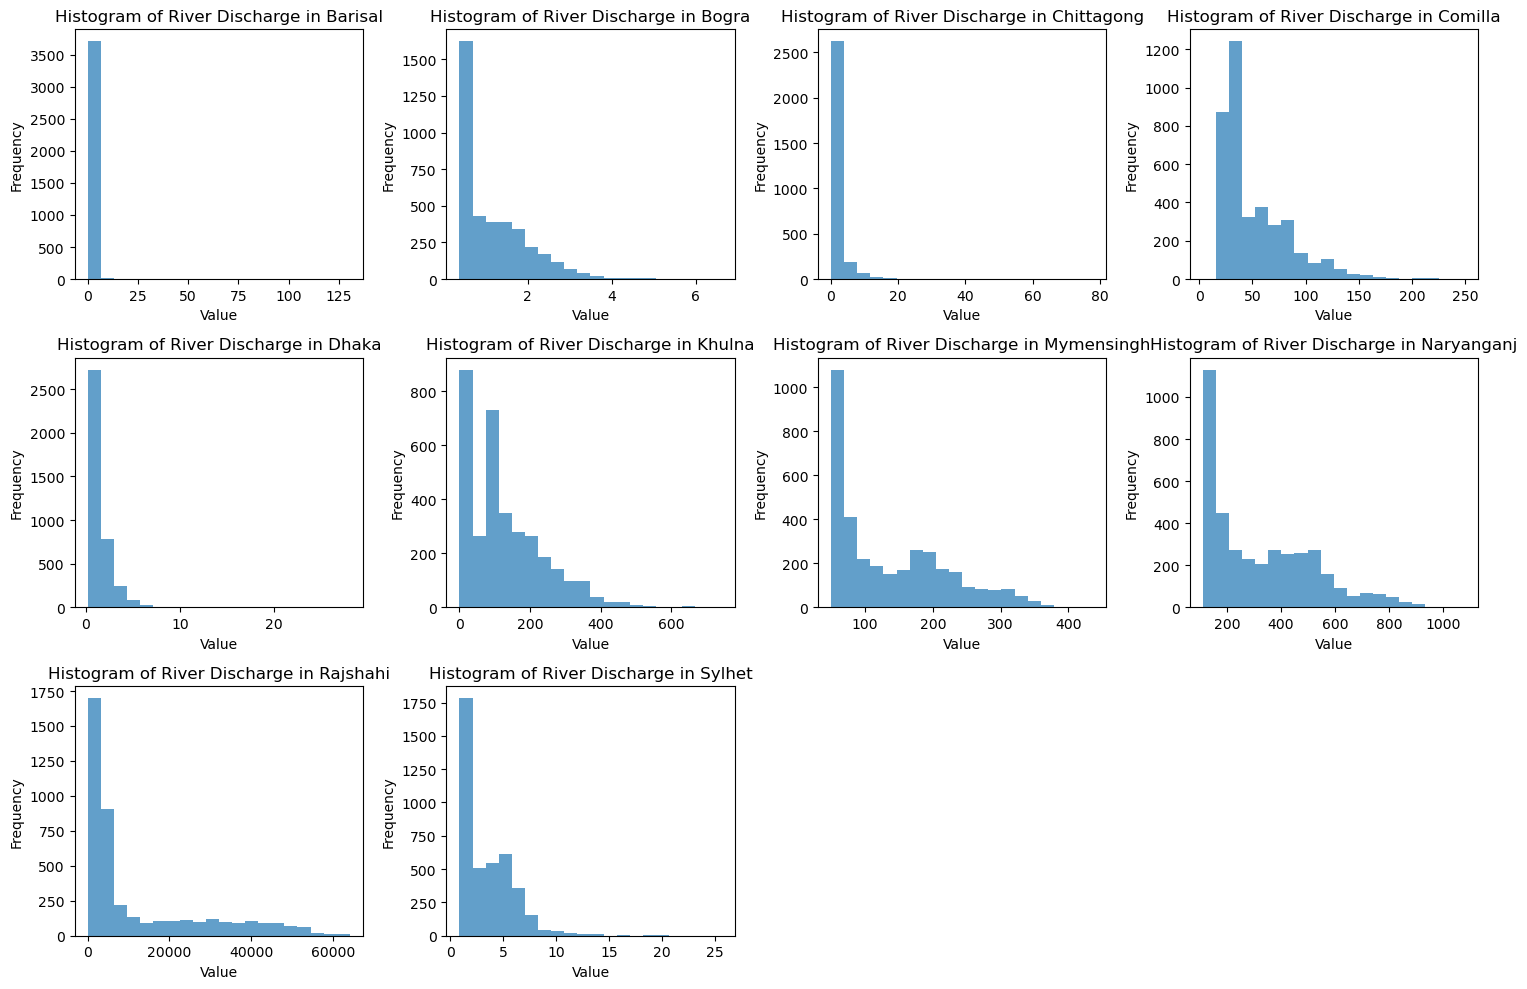

In [35]:
# Create a histogram for 'river_discharge' for each district
def create_histogram(dataframe, district_name, ax):
    ax.hist(dataframe['river_discharge'], bins=20, alpha=0.7)
    ax.set_title(f"Histogram of River Discharge in {district_name}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate histograms for each district
create_histogram(df_barisal, "Barisal", axes[0,0])
create_histogram(df_bogra, "Bogra", axes[0,1])
create_histogram(df_chittagong, "Chittagong", axes[0,2])
create_histogram(df_comilla, "Comilla", axes[0,3])
create_histogram(df_dhaka, "Dhaka", axes[1,0])
create_histogram(df_khulna, "Khulna", axes[1,1])
create_histogram(df_mymensingh, "Mymensingh", axes[1,2])
create_histogram(df_naryanganj, "Naryanganj", axes[1,3])
create_histogram(df_rajshahi, "Rajshahi", axes[2,0])
create_histogram(df_sylhet, "Sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- The distribution of 'river_discharge' for all districts are right skewed.

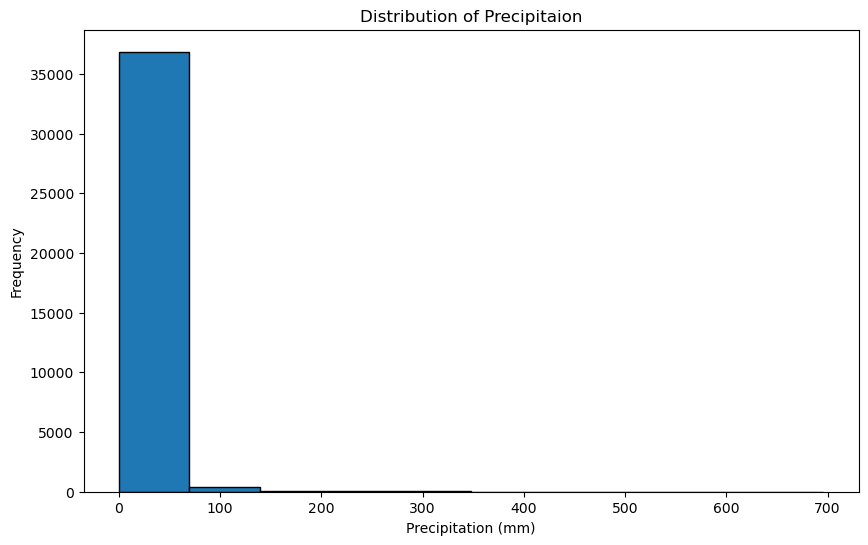

In [36]:
# Create a histogram for 'precip'
plt.figure(figsize=(10, 6))
plt.hist(df_weather["precip"], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitaion')

# Show the plot
plt.show()

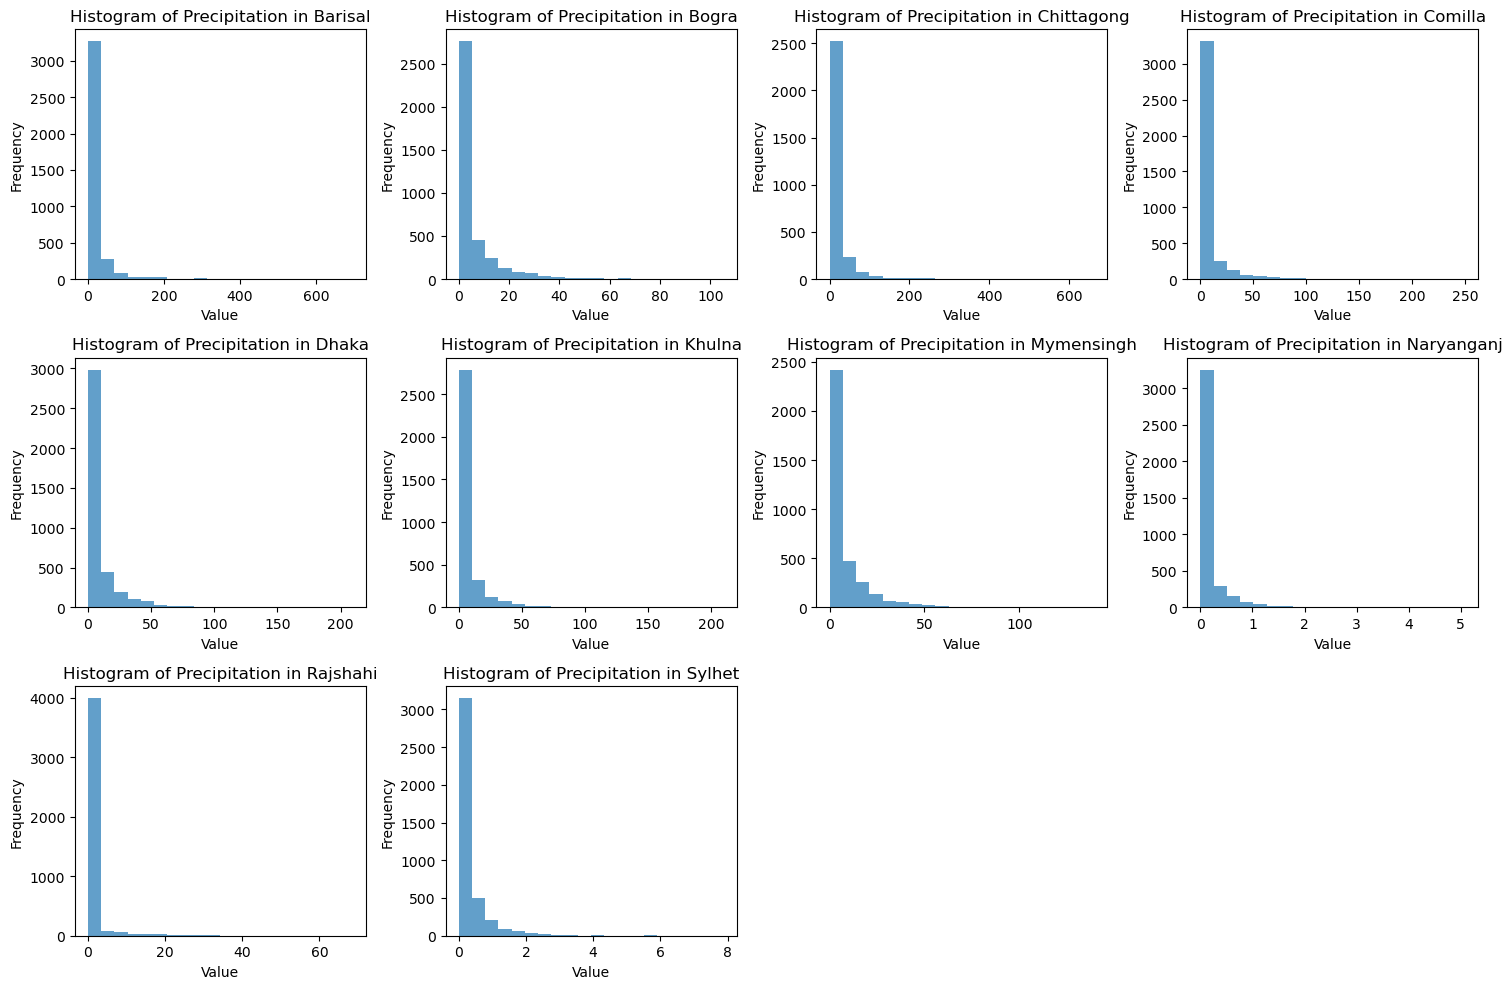

In [37]:
# Create a histogram for 'precip' for each district
def create_histogram(dataframe, district_name, ax):
    ax.hist(dataframe['precip'], bins=20, alpha=0.7)
    ax.set_title(f"Histogram of Precipitation in {district_name}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate histograms for each district
create_histogram(df_barisal, "Barisal", axes[0,0])
create_histogram(df_bogra, "Bogra", axes[0,1])
create_histogram(df_chittagong, "Chittagong", axes[0,2])
create_histogram(df_comilla, "Comilla", axes[0,3])
create_histogram(df_dhaka, "Dhaka", axes[1,0])
create_histogram(df_khulna, "Khulna", axes[1,1])
create_histogram(df_mymensingh, "Mymensingh", axes[1,2])
create_histogram(df_naryanganj, "Naryanganj", axes[1,3])
create_histogram(df_rajshahi, "Rajshahi", axes[2,0])
create_histogram(df_sylhet, "Sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- The distribution of 'precip' for all districts are right skewed.

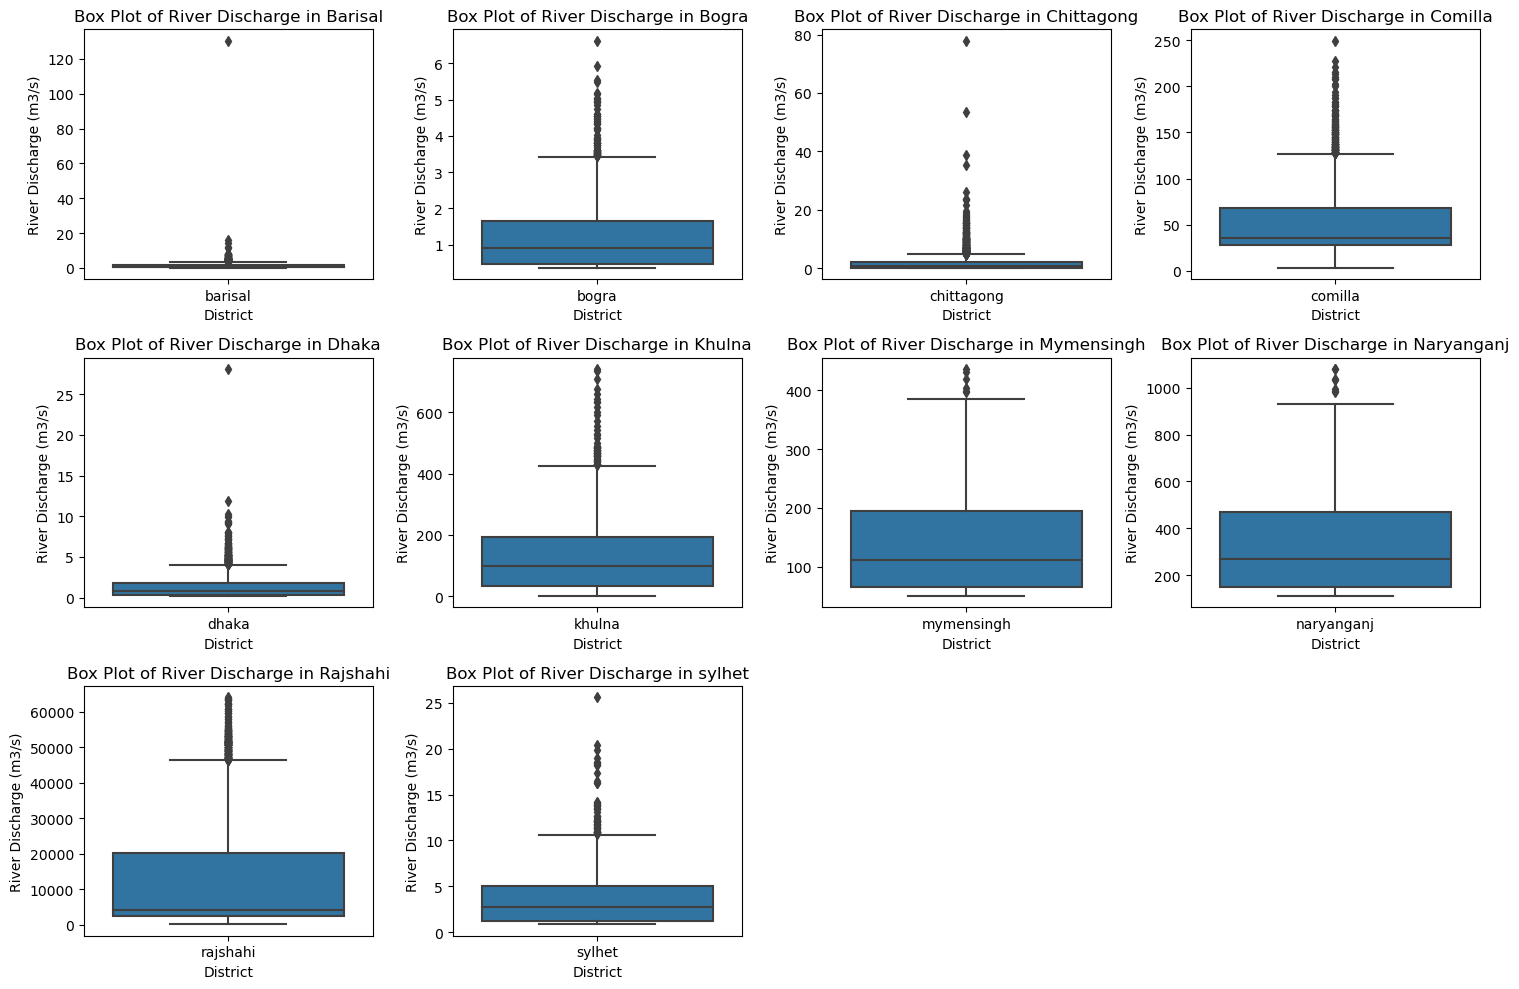

In [38]:
# Check for outliers in 'river_discharge' for each district
def create_boxplot(dataframe, district_name, ax):
    sns.boxplot(x='name', y='river_discharge', data=dataframe, ax=ax)
    ax.set_title(f"Box Plot of River Discharge in {district_name}")
    ax.set_xlabel("District")
    ax.set_ylabel("River Discharge (m3/s)")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate box plots for each districts
create_boxplot(df_barisal, "Barisal", axes[0,0])
create_boxplot(df_bogra, "Bogra", axes[0,1])
create_boxplot(df_chittagong, "Chittagong", axes[0,2])
create_boxplot(df_comilla, "Comilla", axes[0,3])
create_boxplot(df_dhaka, "Dhaka", axes[1,0])
create_boxplot(df_khulna, "Khulna", axes[1,1])
create_boxplot(df_mymensingh, "Mymensingh", axes[1,2])
create_boxplot(df_naryanganj, "Naryanganj", axes[1,3])
create_boxplot(df_rajshahi, "Rajshahi", axes[2,0])
create_boxplot(df_sylhet, "sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- In Barisal district, there is one data point has >120m3/s.
- In Dhaka district, there is one data point has >25m3/s.
- These 2 outliers are removed.

In [39]:
# Remove outlier in Barisal
df_weather = df_weather[~((df_weather['name'] == 'barisal') & (df_weather['river_discharge'] > 120))]

# Remove outlier in Dhaka
df_weather = df_weather[~((df_weather['name'] == 'dhaka') & (df_weather['river_discharge'] > 25))]

# update data for specific districts
df_barisal = df_weather[df_weather['name'] == 'barisal']
df_bogra = df_weather[df_weather['name'] == 'bogra']
df_chittagong = df_weather[df_weather['name'] == 'chittagong']
df_comilla = df_weather[df_weather['name'] == 'comilla']
df_dhaka = df_weather[df_weather['name'] == 'dhaka']
df_khulna = df_weather[df_weather['name'] == 'khulna']
df_mymensingh = df_weather[df_weather['name'] == 'mymensingh']
df_naryanganj = df_weather[df_weather['name'] == 'naryanganj']
df_rajshahi = df_weather[df_weather['name'] == 'rajshahi']
df_sylhet = df_weather[df_weather['name'] == 'sylhet']

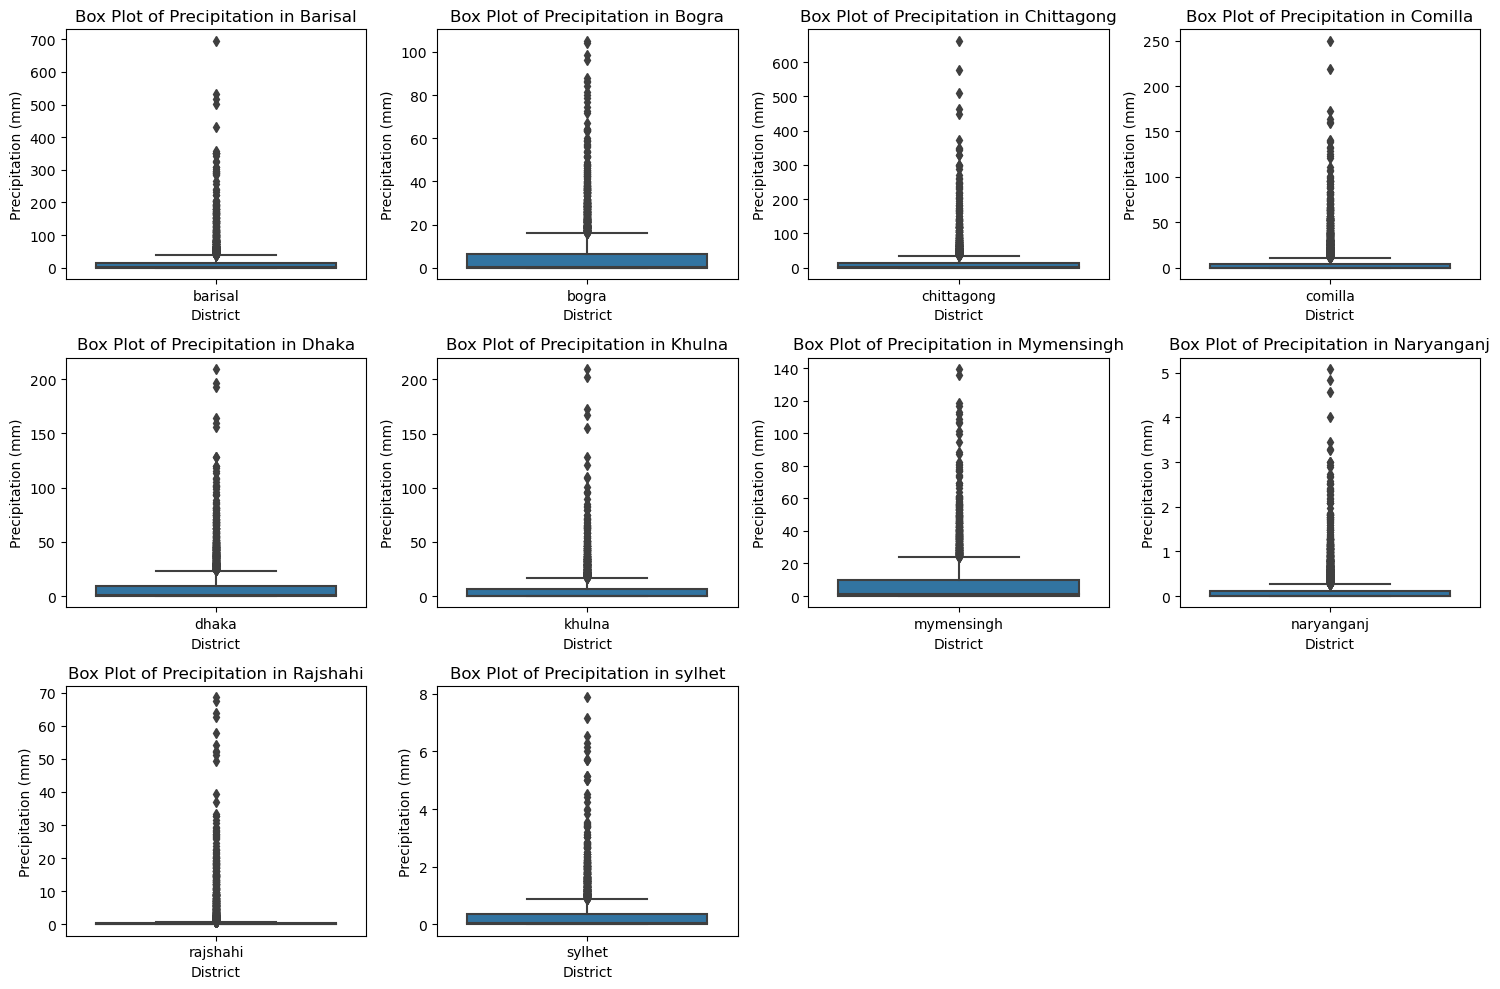

In [40]:
# Check for outliers in 'precip' for each district
def create_boxplot(dataframe, district_name, ax):
    sns.boxplot(x='name', y='precip', data=dataframe, ax=ax)
    ax.set_title(f"Box Plot of Precipitation in {district_name}")
    ax.set_xlabel("District")
    ax.set_ylabel("Precipitation (mm)")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate box plots for each districts
create_boxplot(df_barisal, "Barisal", axes[0,0])
create_boxplot(df_bogra, "Bogra", axes[0,1])
create_boxplot(df_chittagong, "Chittagong", axes[0,2])
create_boxplot(df_comilla, "Comilla", axes[0,3])
create_boxplot(df_dhaka, "Dhaka", axes[1,0])
create_boxplot(df_khulna, "Khulna", axes[1,1])
create_boxplot(df_mymensingh, "Mymensingh", axes[1,2])
create_boxplot(df_naryanganj, "Naryanganj", axes[1,3])
create_boxplot(df_rajshahi, "Rajshahi", axes[2,0])
create_boxplot(df_sylhet, "sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Now, we will look at the relationship between 'river_discharge' and 'precip'.

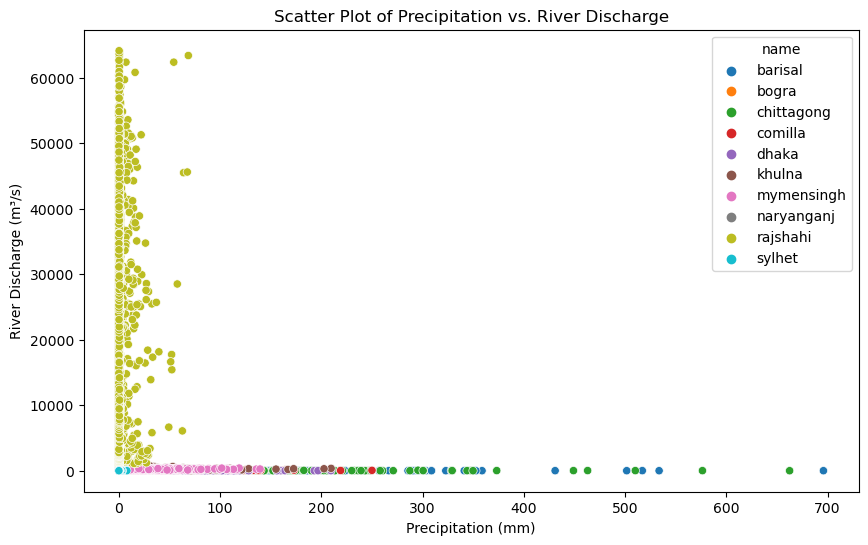

In [41]:
# Create the scatter plot for 'precip' and 'river_discharge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='river_discharge', hue='name', data=df_weather)

# Labeling axes
plt.xlabel('Precipitation (mm)')
plt.ylabel('River Discharge (m³/s)')

# Adding a title
plt.title('Scatter Plot of Precipitation vs. River Discharge')

# Display the plot
plt.show()

- The 'river_discharge' of Rajshahi district is much higher than other district. Therefore, we will look at the scatter plot for each district individually.
- Rajshahi district has high river discharge due to its strategic location near the confluence of two major rivers: the Ganges (known as the Padma in Bangladesh) and the Brahmaputra (known as the Jamuna in Bangladesh).

In [42]:
# Filter data for rainy periods (summer, monsson & late autumn)
def filter_data_for_periods(df, district_name):
    conditions = [
        # Summer period (April 15th to June 15th)
        ((df["datetime"].dt.month == 4) & (df["datetime"].dt.day >= 15))
          | ((df["datetime"].dt.month == 5))
          | ((df["datetime"].dt.month == 6) & (df["datetime"].dt.day < 15)),
    
        # Monsoon period (June 15th to October 15th)
        ((df["datetime"].dt.month == 6) & (df["datetime"].dt.day >= 15))
          | ((df["datetime"].dt.month == 7))
          | ((df["datetime"].dt.month == 8))
          | ((df["datetime"].dt.month == 9))
          | ((df["datetime"].dt.month == 10) & (df["datetime"].dt.day < 15)),
        
        # Late autumn period (October 15th to December 15th)
        ((df["datetime"].dt.month == 10) & (df["datetime"].dt.day >= 15))
          | ((df["datetime"].dt.month == 11))
          | ((df["datetime"].dt.month == 12) & (df["datetime"].dt.day < 15)),
    ]

    # Combine the conditions using OR
    filtered_df = df[np.any(conditions, axis=0)]
    
    return filtered_df

# Filter data for each district
df_barisal_rainy = filter_data_for_periods(df_barisal, "Barisal")
df_bogra_rainy = filter_data_for_periods(df_bogra, "Bogra")
df_chittagong_rainy = filter_data_for_periods(df_chittagong, "Chittagong")
df_comilla_rainy = filter_data_for_periods(df_comilla, "Comilla")
df_dhaka_rainy = filter_data_for_periods(df_dhaka, "Dhaka")
df_khulna_rainy = filter_data_for_periods(df_khulna, "Khulna")
df_mymensingh_rainy = filter_data_for_periods(df_mymensingh, "Mymensingh")
df_naryanganj_rainy = filter_data_for_periods(df_naryanganj, "Naryanganj")
df_rajshahi_rainy = filter_data_for_periods(df_rajshahi, "Rajshahi")
df_sylhet_rainy = filter_data_for_periods(df_sylhet, "Sylhet")

In [43]:
# Filter data for monsoon period only
def filter_data_for_monsoon(df, district_name):
    conditions = [
        # Monsoon period (June 15th to October 15th)
        ((df["datetime"].dt.month == 6) & (df["datetime"].dt.day >= 15))
          | ((df["datetime"].dt.month == 7))
          | ((df["datetime"].dt.month == 8))
          | ((df["datetime"].dt.month == 9))
          | ((df["datetime"].dt.month == 10) & (df["datetime"].dt.day <= 15)),
    ]

    # Combine the conditions using OR
    filtered_df = df[np.any(conditions, axis=0)]
    
    return filtered_df

# Filter data for each district for monsoon season only
df_barisal_monsoon = filter_data_for_monsoon(df_barisal, "Barisal")
df_bogra_monsoon = filter_data_for_monsoon(df_bogra, "Bogra")
df_chittagong_monsoon = filter_data_for_monsoon(df_chittagong, "Chittagong")
df_comilla_monsoon = filter_data_for_monsoon(df_comilla, "Comilla")
df_dhaka_monsoon = filter_data_for_monsoon(df_dhaka, "Dhaka")
df_khulna_monsoon = filter_data_for_monsoon(df_khulna, "Khulna")
df_mymensingh_monsoon = filter_data_for_monsoon(df_mymensingh, "Mymensingh")
df_naryanganj_monsoon = filter_data_for_monsoon(df_naryanganj, "Naryanganj")
df_rajshahi_monsoon = filter_data_for_monsoon(df_rajshahi, "Rajshahi")
df_sylhet_monsoon = filter_data_for_monsoon(df_sylhet, "Sylhet")

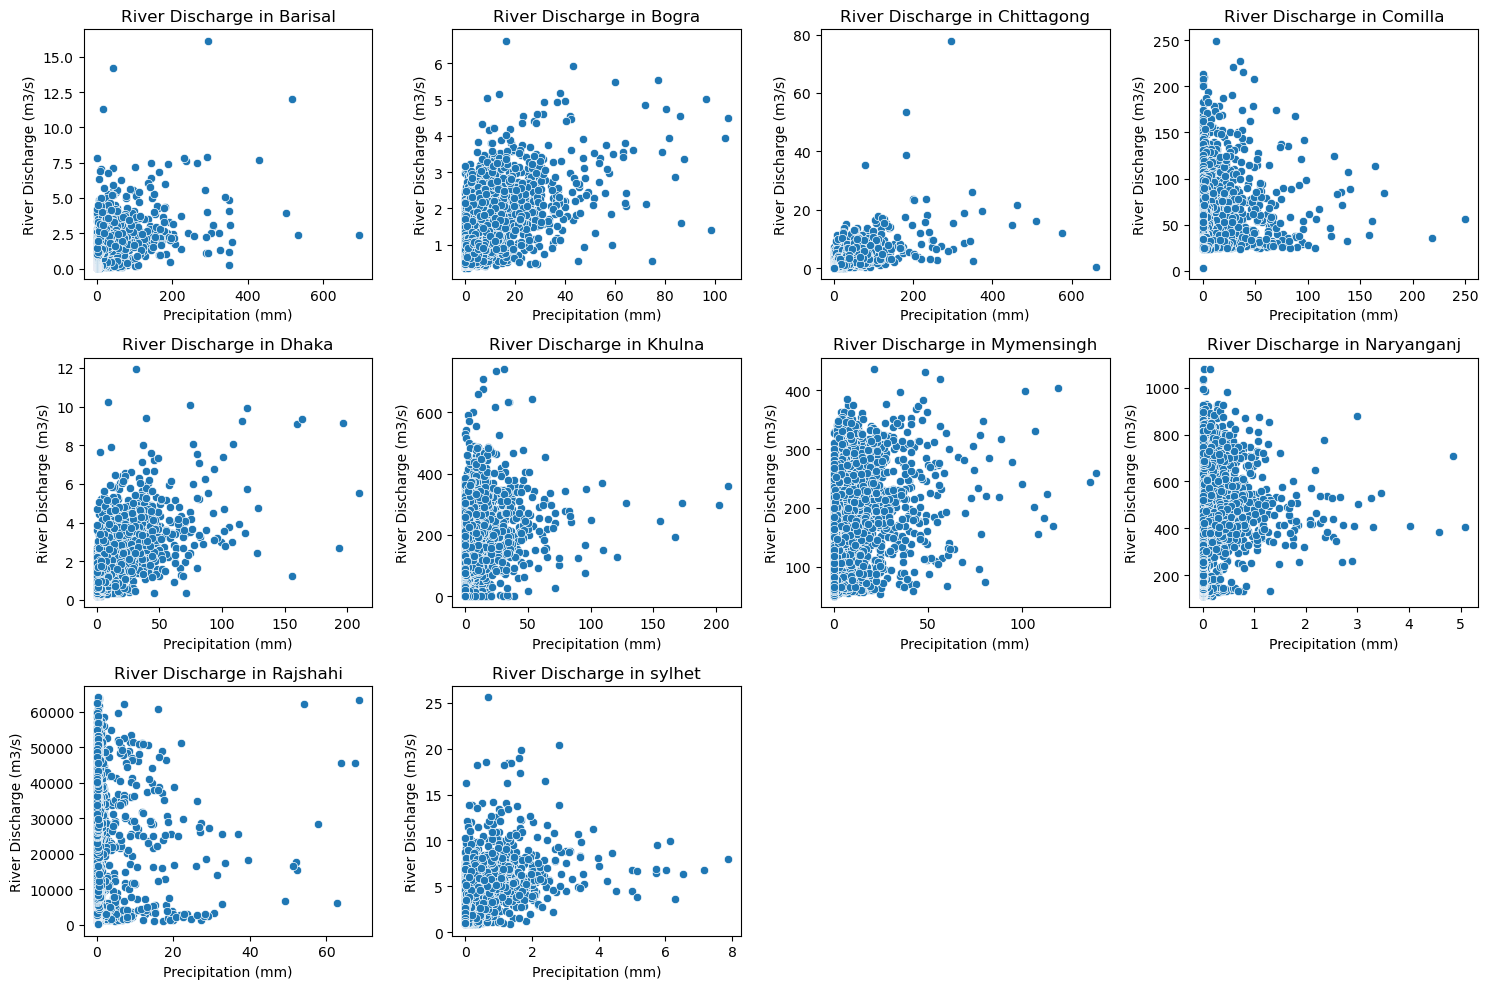

In [44]:
# Create the scatter plot for 'precip' and 'river_discharge for each district
def create_scatterplot(dataframe, district_name, ax):
    sns.scatterplot(x='precip', y='river_discharge', data=dataframe, ax=ax)
    ax.set_title(f"River Discharge in {district_name}")
    ax.set_xlabel("Precipitation (mm)")
    ax.set_ylabel("River Discharge (m3/s)")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate box plots for each districts
create_scatterplot(df_barisal, "Barisal", axes[0,0])
create_scatterplot(df_bogra, "Bogra", axes[0,1])
create_scatterplot(df_chittagong, "Chittagong", axes[0,2])
create_scatterplot(df_comilla, "Comilla", axes[0,3])
create_scatterplot(df_dhaka, "Dhaka", axes[1,0])
create_scatterplot(df_khulna, "Khulna", axes[1,1])
create_scatterplot(df_mymensingh, "Mymensingh", axes[1,2])
create_scatterplot(df_naryanganj, "Naryanganj", axes[1,3])
create_scatterplot(df_rajshahi, "Rajshahi", axes[2,0])
create_scatterplot(df_sylhet, "sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Next, we will look at the scatter plot for rainy periods (summer, monsoon, late summer) and monsoon period only.

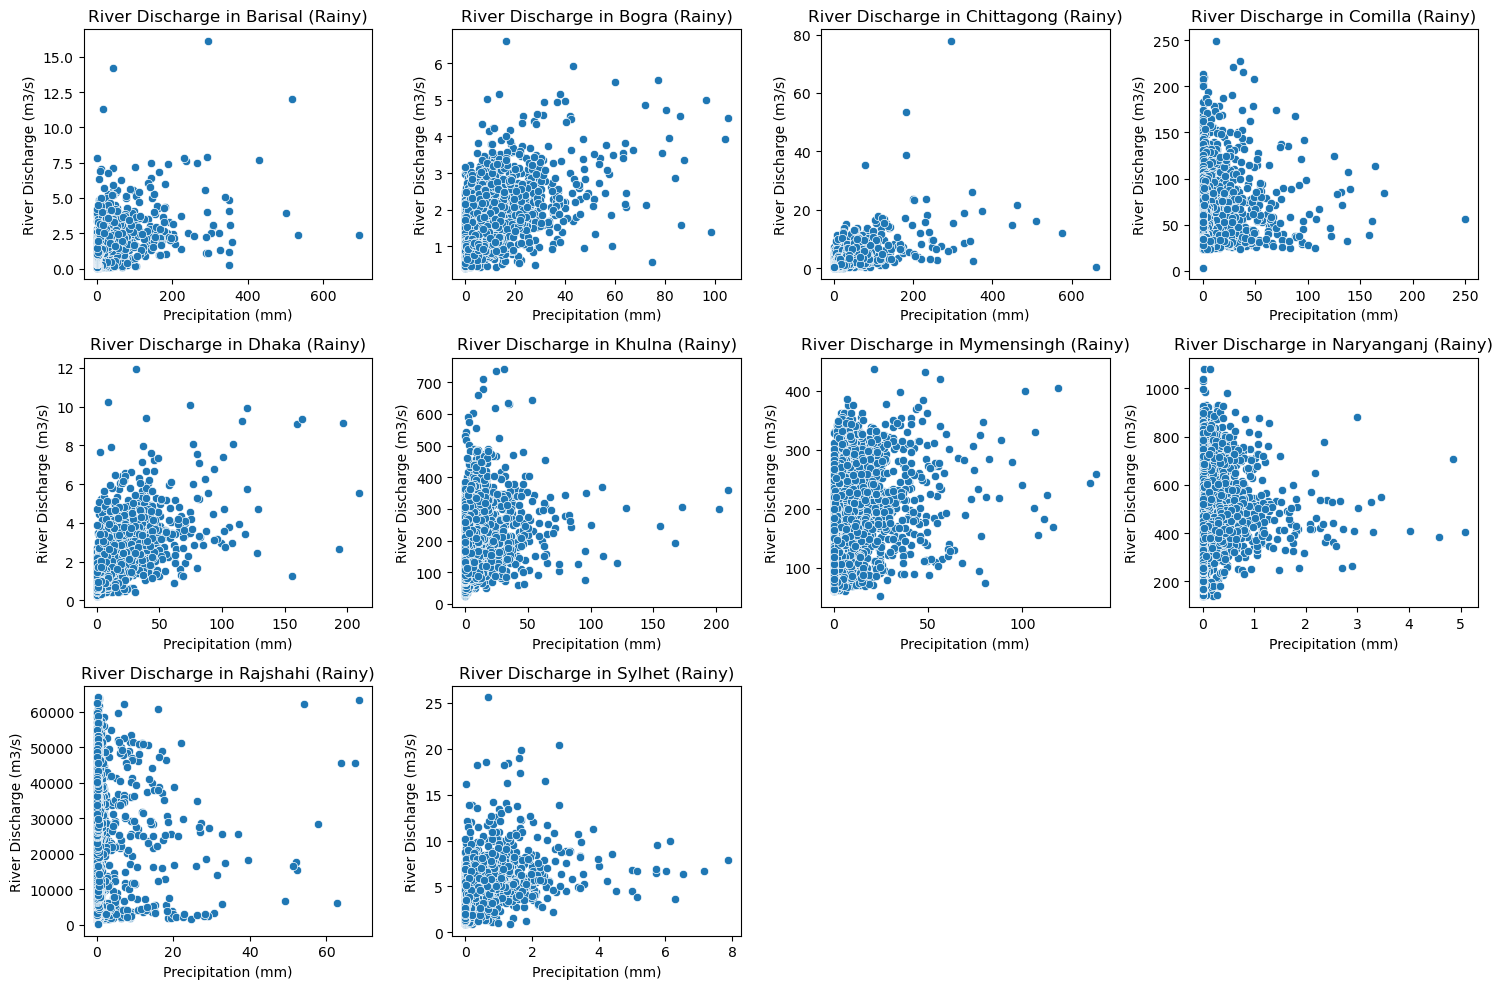

In [45]:
# Create the scatter plot for 'precip' and 'river_discharge for each district for rainy period only
def create_scatterplot(dataframe, district_name, ax):
    sns.scatterplot(x='precip', y='river_discharge', data=dataframe, ax=ax)
    ax.set_title(f"River Discharge in {district_name} (Rainy)")
    ax.set_xlabel("Precipitation (mm)")
    ax.set_ylabel("River Discharge (m3/s)")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate box plots for each district during rainy period
create_scatterplot(df_barisal_rainy, "Barisal", axes[0,0])
create_scatterplot(df_bogra_rainy, "Bogra", axes[0,1])
create_scatterplot(df_chittagong_rainy, "Chittagong", axes[0,2])
create_scatterplot(df_comilla_rainy, "Comilla", axes[0,3])
create_scatterplot(df_dhaka_rainy, "Dhaka", axes[1,0])
create_scatterplot(df_khulna_rainy, "Khulna", axes[1,1])
create_scatterplot(df_mymensingh_rainy, "Mymensingh", axes[1,2])
create_scatterplot(df_naryanganj_rainy, "Naryanganj", axes[1,3])
create_scatterplot(df_rajshahi_rainy, "Rajshahi", axes[2,0])
create_scatterplot(df_sylhet_rainy, "Sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Scatter plots for all periods and rainy periods are similar.

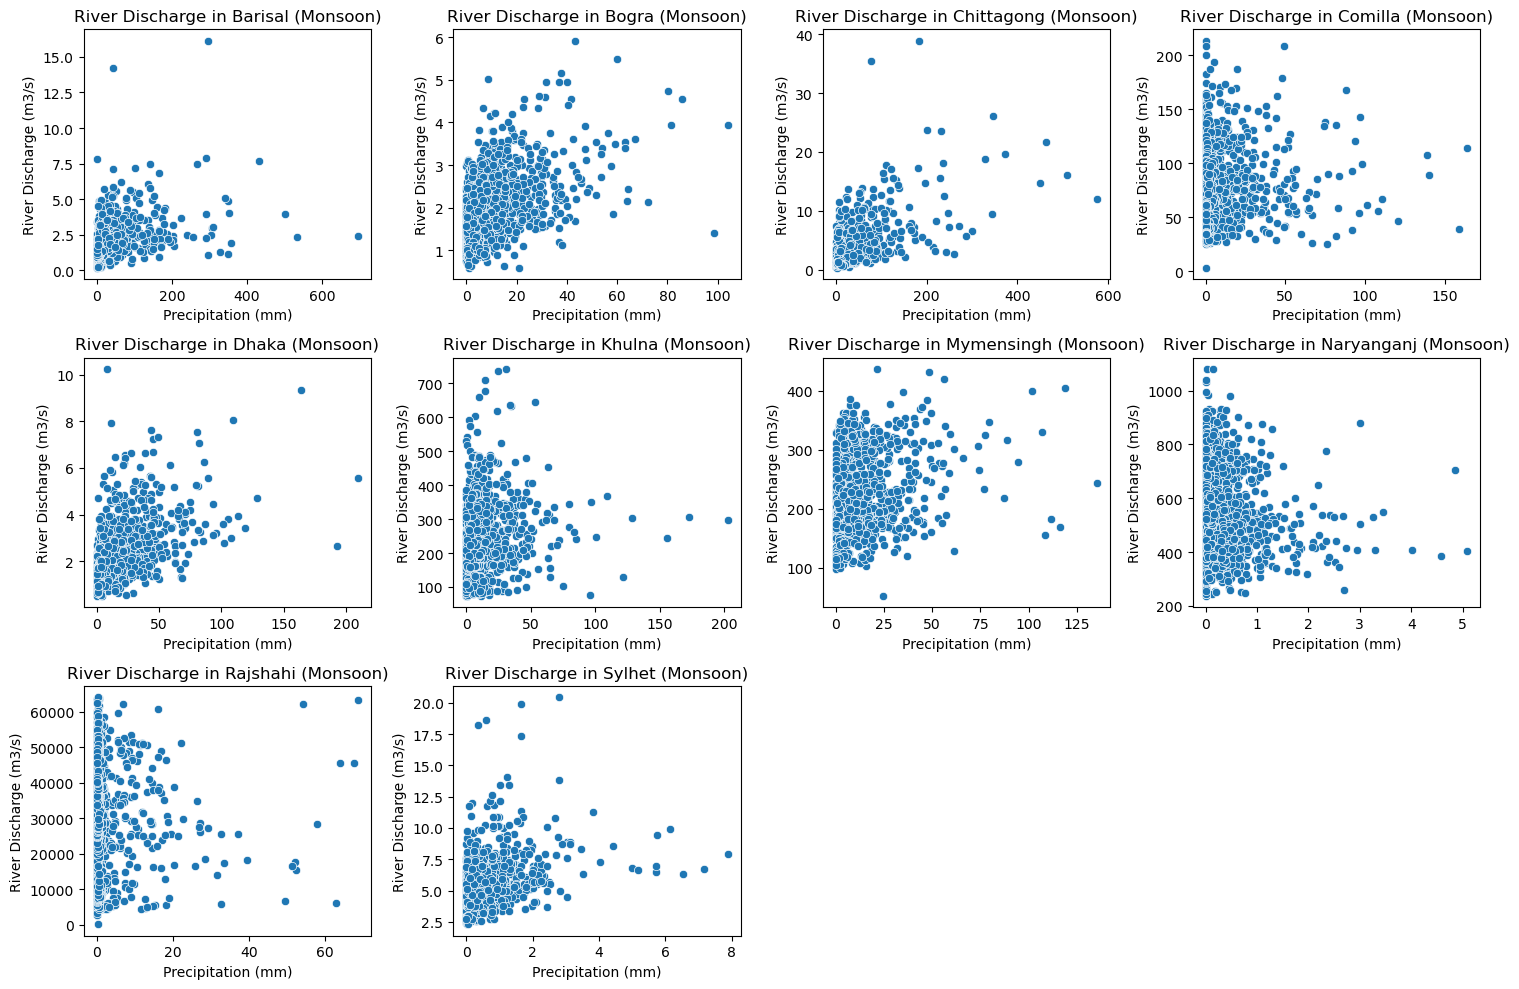

In [46]:
# Create the scatter plot for 'precip' and 'river_discharge for each district for moonsoon period only
def create_scatterplot(dataframe, district_name, ax):
    sns.scatterplot(x='precip', y='river_discharge', data=dataframe, ax=ax)
    ax.set_title(f"River Discharge in {district_name} (Monsoon)")
    ax.set_xlabel("Precipitation (mm)")
    ax.set_ylabel("River Discharge (m3/s)")

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Generate box plots for each district during monsoon period
create_scatterplot(df_barisal_monsoon, "Barisal", axes[0,0])
create_scatterplot(df_bogra_monsoon, "Bogra", axes[0,1])
create_scatterplot(df_chittagong_monsoon, "Chittagong", axes[0,2])
create_scatterplot(df_comilla_monsoon, "Comilla", axes[0,3])
create_scatterplot(df_dhaka_monsoon, "Dhaka", axes[1,0])
create_scatterplot(df_khulna_monsoon, "Khulna", axes[1,1])
create_scatterplot(df_mymensingh_monsoon, "Mymensingh", axes[1,2])
create_scatterplot(df_naryanganj_monsoon, "Naryanganj", axes[1,3])
create_scatterplot(df_rajshahi_monsoon, "Rajshahi", axes[2,0])
create_scatterplot(df_sylhet_monsoon, "Sylhet", axes[2,1])

# Remove empty subplots
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

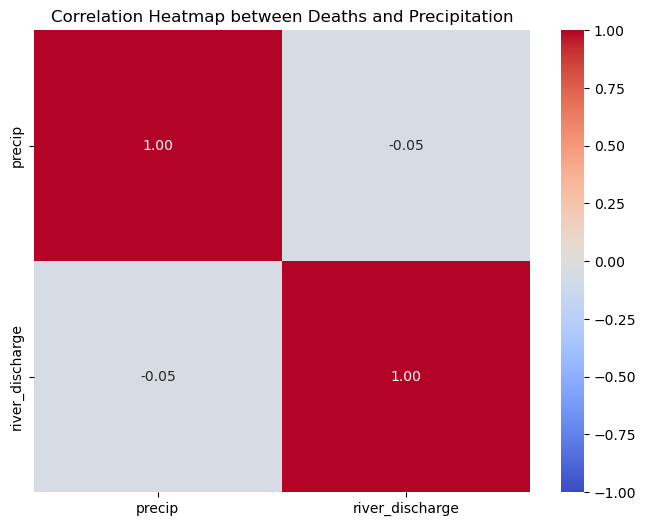

In [47]:
# Calculate the correlation matrix
corr_matrix = df_weather[['precip', 'river_discharge']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Deaths and Precipitation')
plt.show()

- Overall, there is a weak negative correlation between 'precip' and 'river_discharge'. 

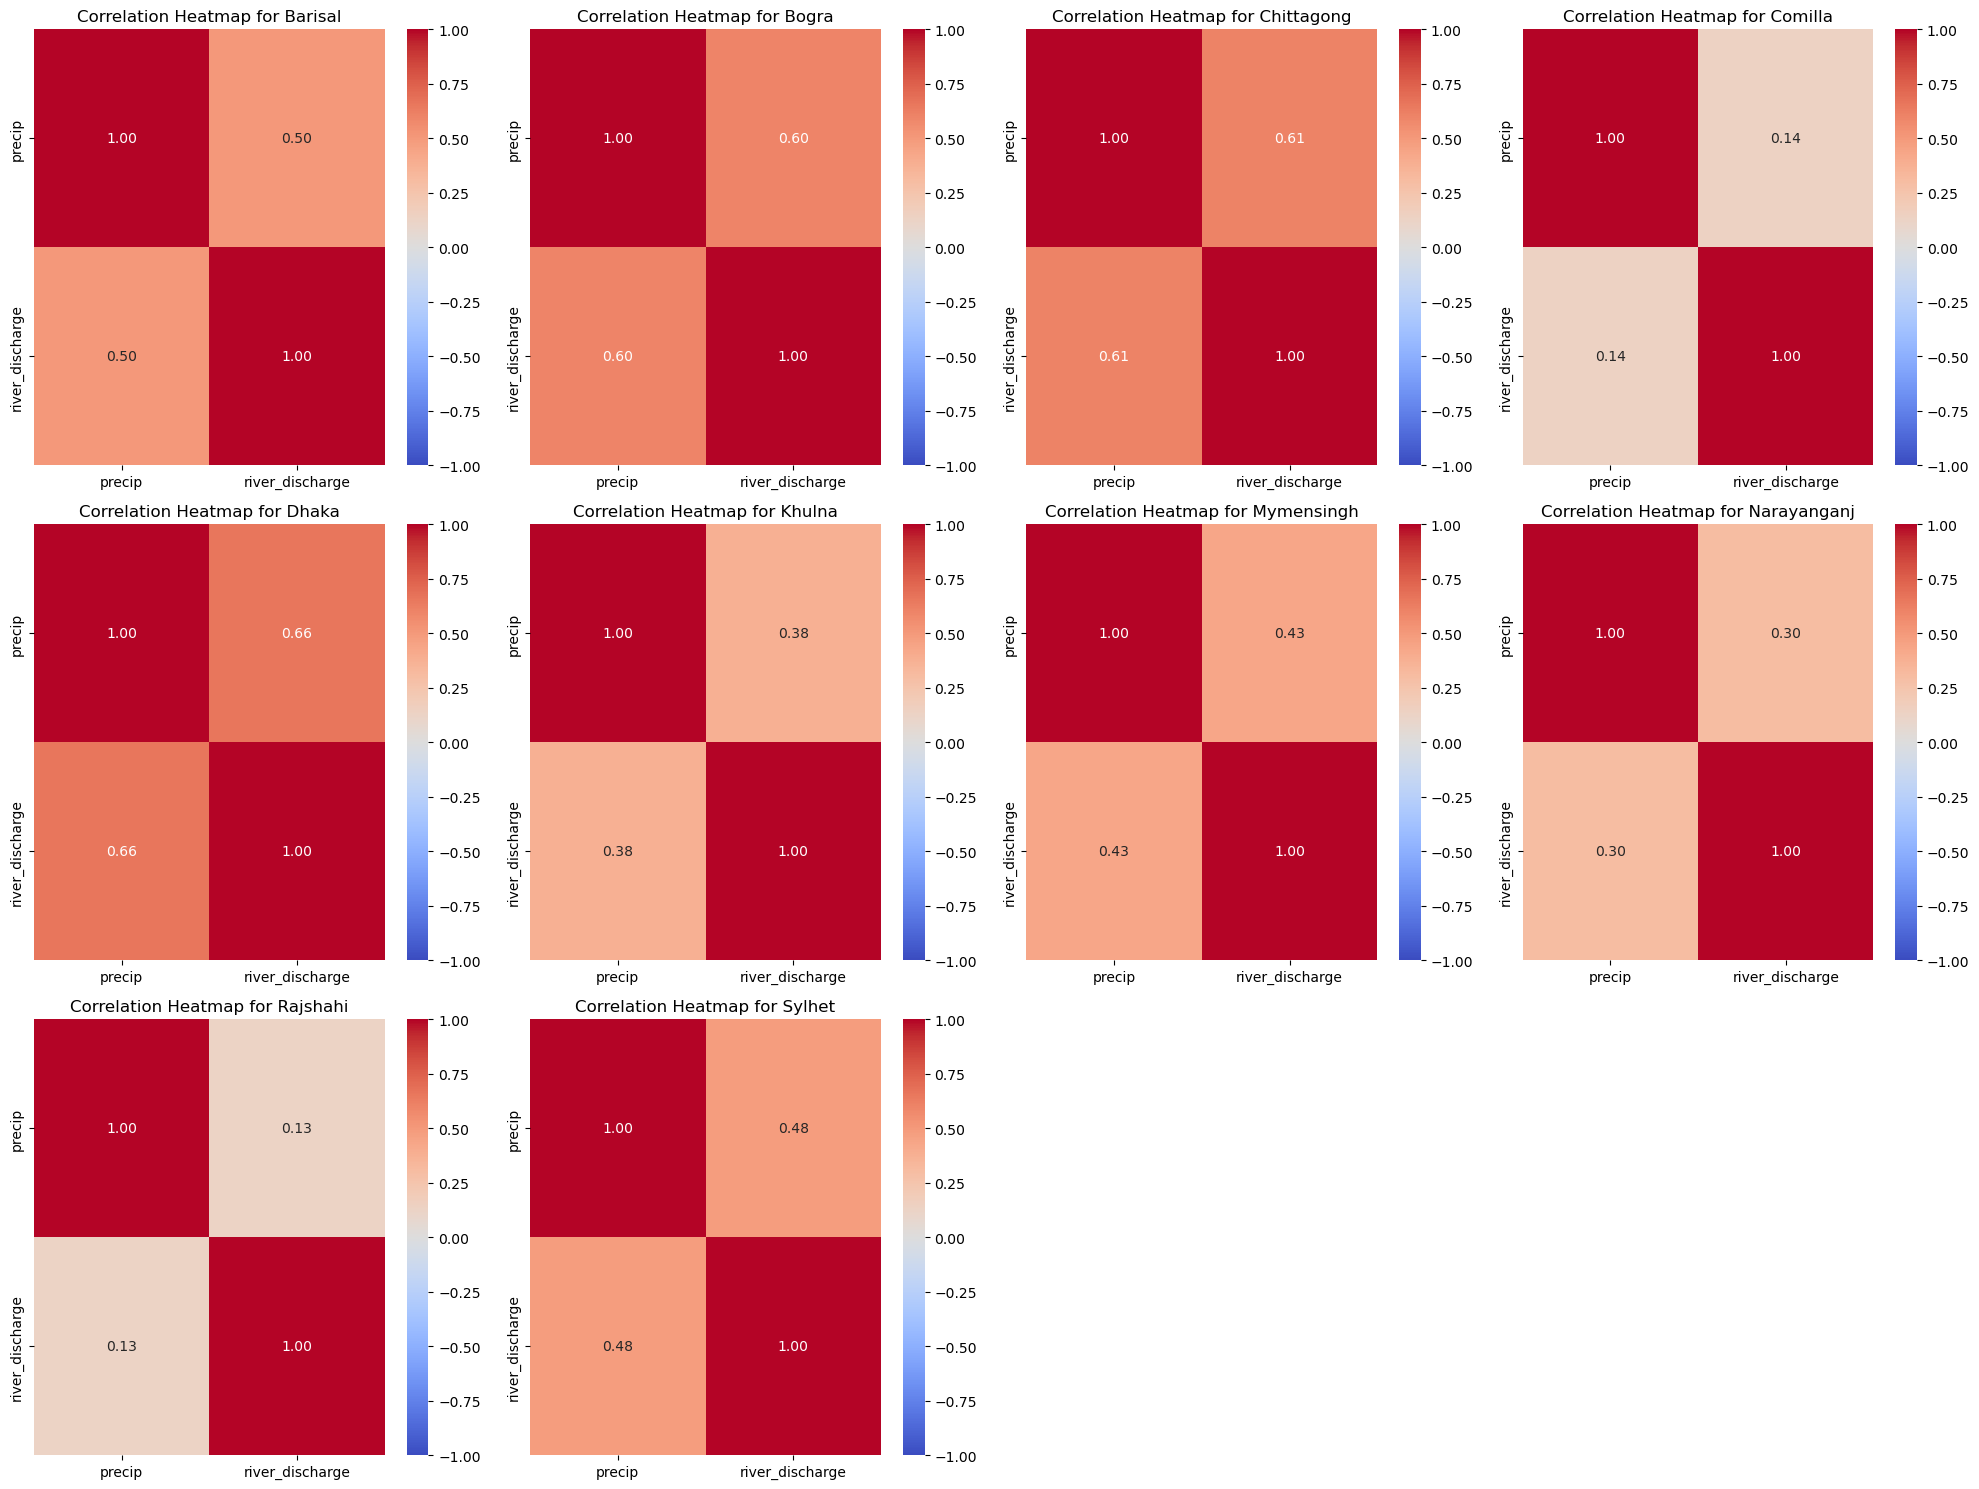

In [48]:
# Calculate the correlation matrix for each districts
def plot_correlation_heatmap(dataframe, title, ax):
    # Calculate the correlation matrix
    corr_matrix = dataframe[['precip', 'river_discharge']].corr()

    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=ax)
    ax.set_title(title)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Generate correlation heatmaps for each district
plot_correlation_heatmap(df_barisal, 'Correlation Heatmap for Barisal', axes[0, 0])
plot_correlation_heatmap(df_bogra, 'Correlation Heatmap for Bogra', axes[0, 1])
plot_correlation_heatmap(df_chittagong, 'Correlation Heatmap for Chittagong', axes[0, 2])
plot_correlation_heatmap(df_comilla, 'Correlation Heatmap for Comilla', axes[0, 3])
plot_correlation_heatmap(df_dhaka, 'Correlation Heatmap for Dhaka', axes[1, 0])
plot_correlation_heatmap(df_khulna, 'Correlation Heatmap for Khulna', axes[1, 1])
plot_correlation_heatmap(df_mymensingh, 'Correlation Heatmap for Mymensingh', axes[1, 2])
plot_correlation_heatmap(df_naryanganj, 'Correlation Heatmap for Narayanganj', axes[1, 3])
plot_correlation_heatmap(df_rajshahi, 'Correlation Heatmap for Rajshahi', axes[2, 0])
plot_correlation_heatmap(df_sylhet, 'Correlation Heatmap for Sylhet', axes[2, 1])

# Remove empty subplots (if any)
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- There is a strong positive correlation between 'precip' and 'river_discharge' for Barisal, Bogra, Chittagong, Dhaka.
- There is a moderate positive correlation between 'precip' and 'river_discharge' for Khulna, Mymensingh, Naryanganj, Sylhet.
- There is a weak positive correlation between 'precip' and 'river_discharge' for Comilla, Rajshahi.

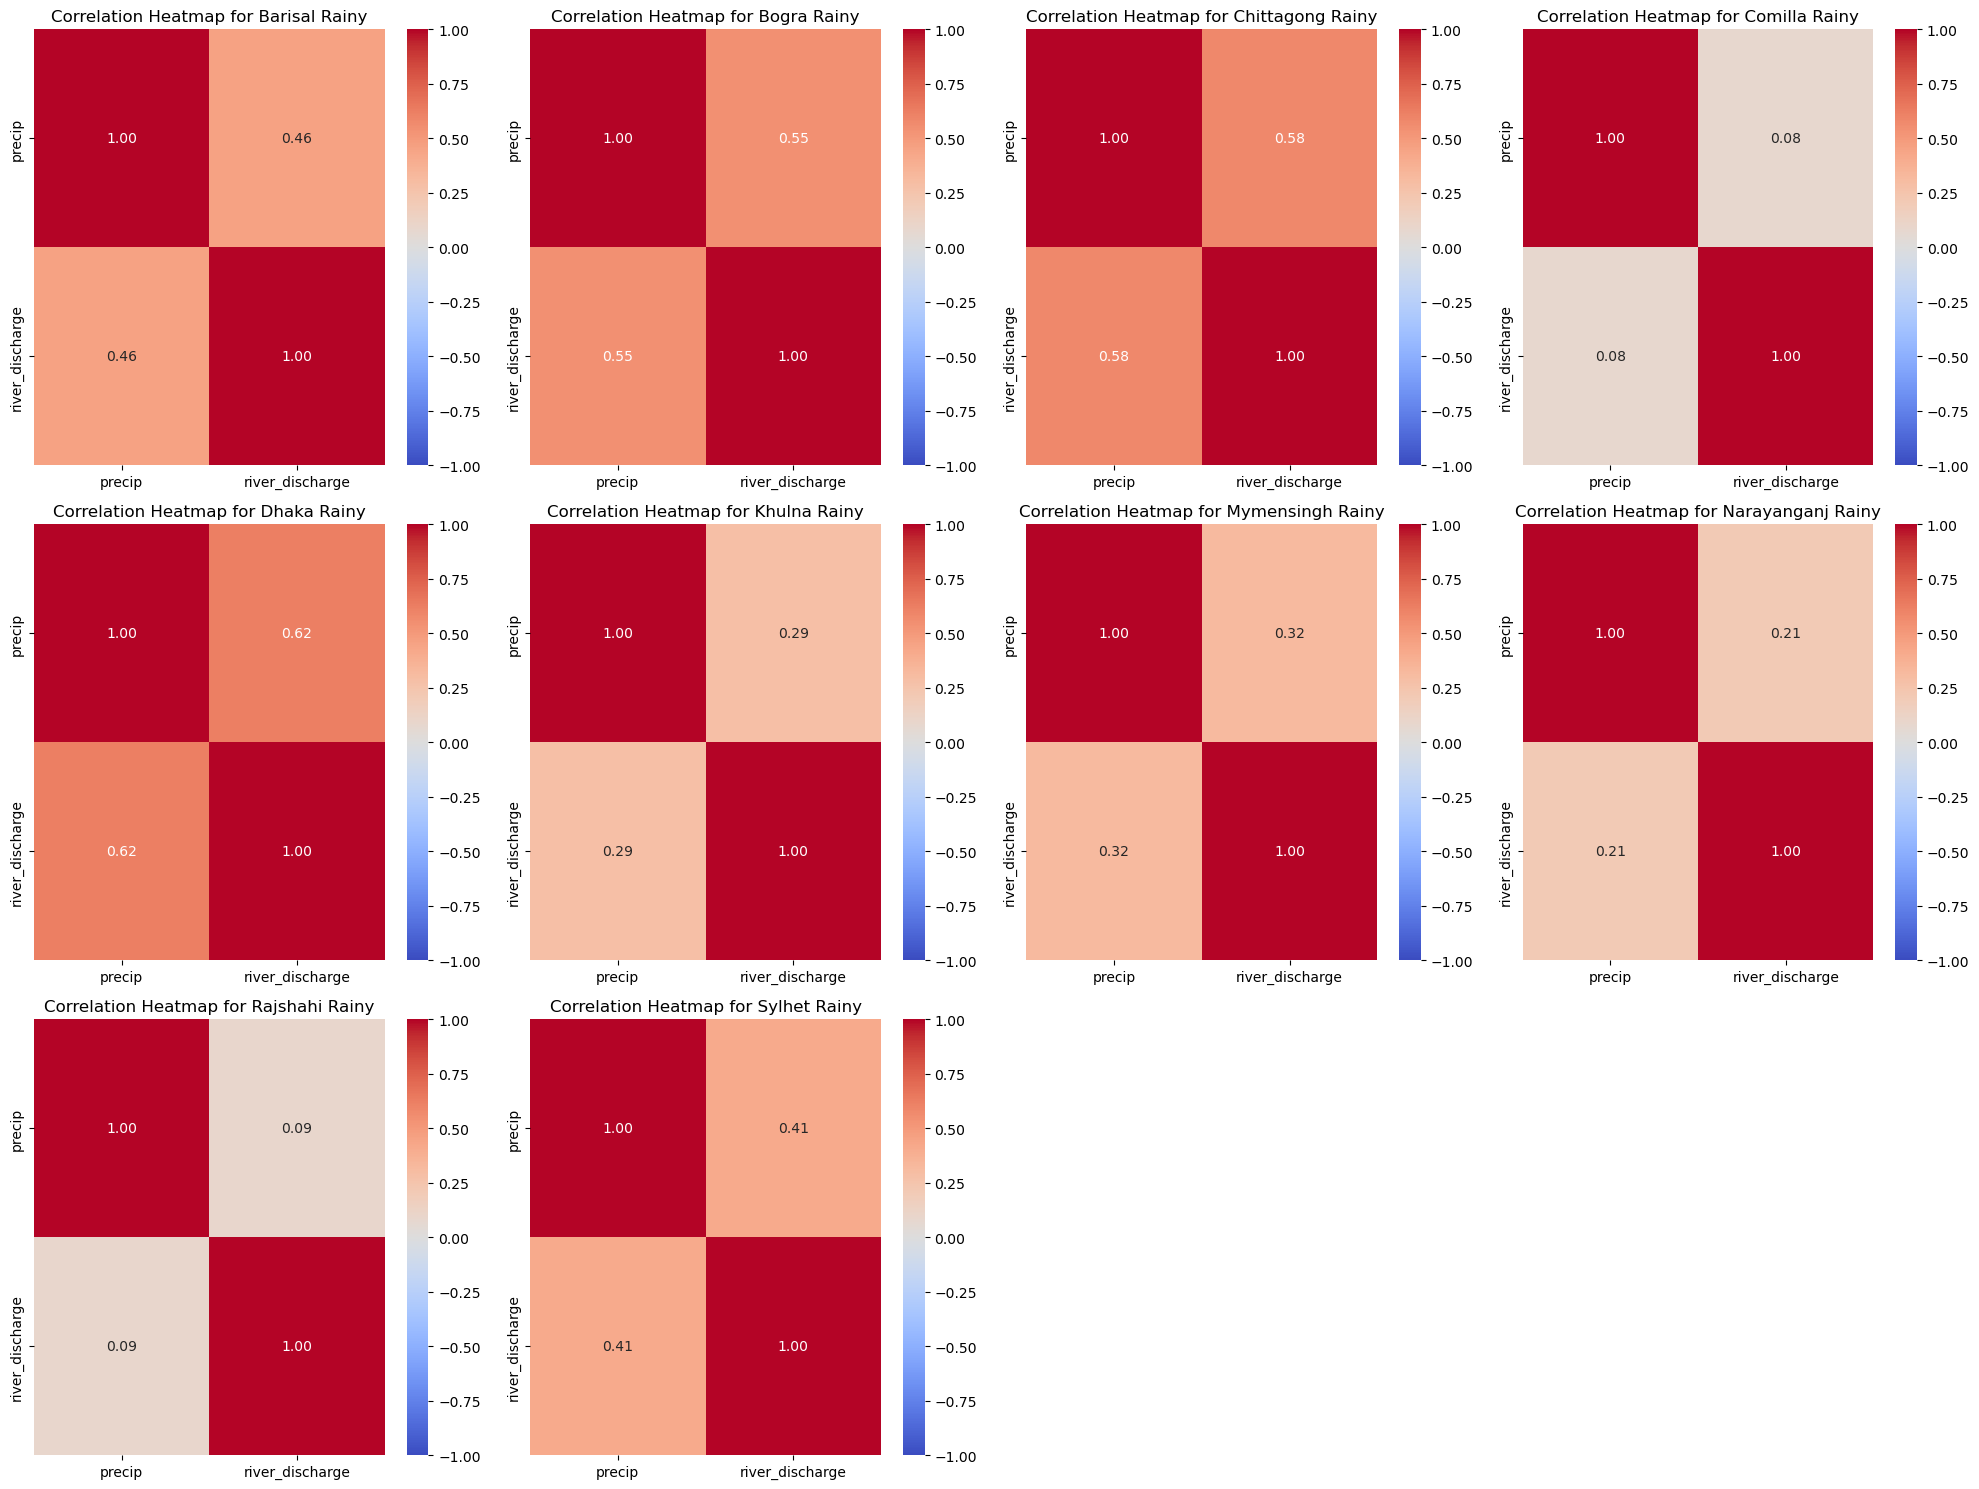

In [49]:
# Calculate the correlation matrix for each district during rainy periods
def plot_correlation_heatmap(dataframe, title, ax):
    # Calculate the correlation matrix
    corr_matrix = dataframe[['precip', 'river_discharge']].corr()

    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=ax)
    ax.set_title(title)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Generate correlation heatmaps for each district during rainy periods
plot_correlation_heatmap(df_barisal_rainy, 'Correlation Heatmap for Barisal Rainy', axes[0, 0])
plot_correlation_heatmap(df_bogra_rainy, 'Correlation Heatmap for Bogra Rainy', axes[0, 1])
plot_correlation_heatmap(df_chittagong_rainy, 'Correlation Heatmap for Chittagong Rainy', axes[0, 2])
plot_correlation_heatmap(df_comilla_rainy, 'Correlation Heatmap for Comilla Rainy', axes[0, 3])
plot_correlation_heatmap(df_dhaka_rainy, 'Correlation Heatmap for Dhaka Rainy', axes[1, 0])
plot_correlation_heatmap(df_khulna_rainy, 'Correlation Heatmap for Khulna Rainy', axes[1, 1])
plot_correlation_heatmap(df_mymensingh_rainy, 'Correlation Heatmap for Mymensingh Rainy', axes[1, 2])
plot_correlation_heatmap(df_naryanganj_rainy, 'Correlation Heatmap for Narayanganj Rainy', axes[1, 3])
plot_correlation_heatmap(df_rajshahi_rainy, 'Correlation Heatmap for Rajshahi Rainy', axes[2, 0])
plot_correlation_heatmap(df_sylhet_rainy, 'Correlation Heatmap for Sylhet Rainy', axes[2, 1])

# Remove empty subplots (if any)
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- There is no significant changes in correlation between 'precip' and 'river_discharge' in Rainy periods as compared to all periods.
- The correlation between 'precip' and 'river_discharge' in rainy periods decreases for Comilla, Khulna, Mymensingh, Narayanganj, Rajshahi.

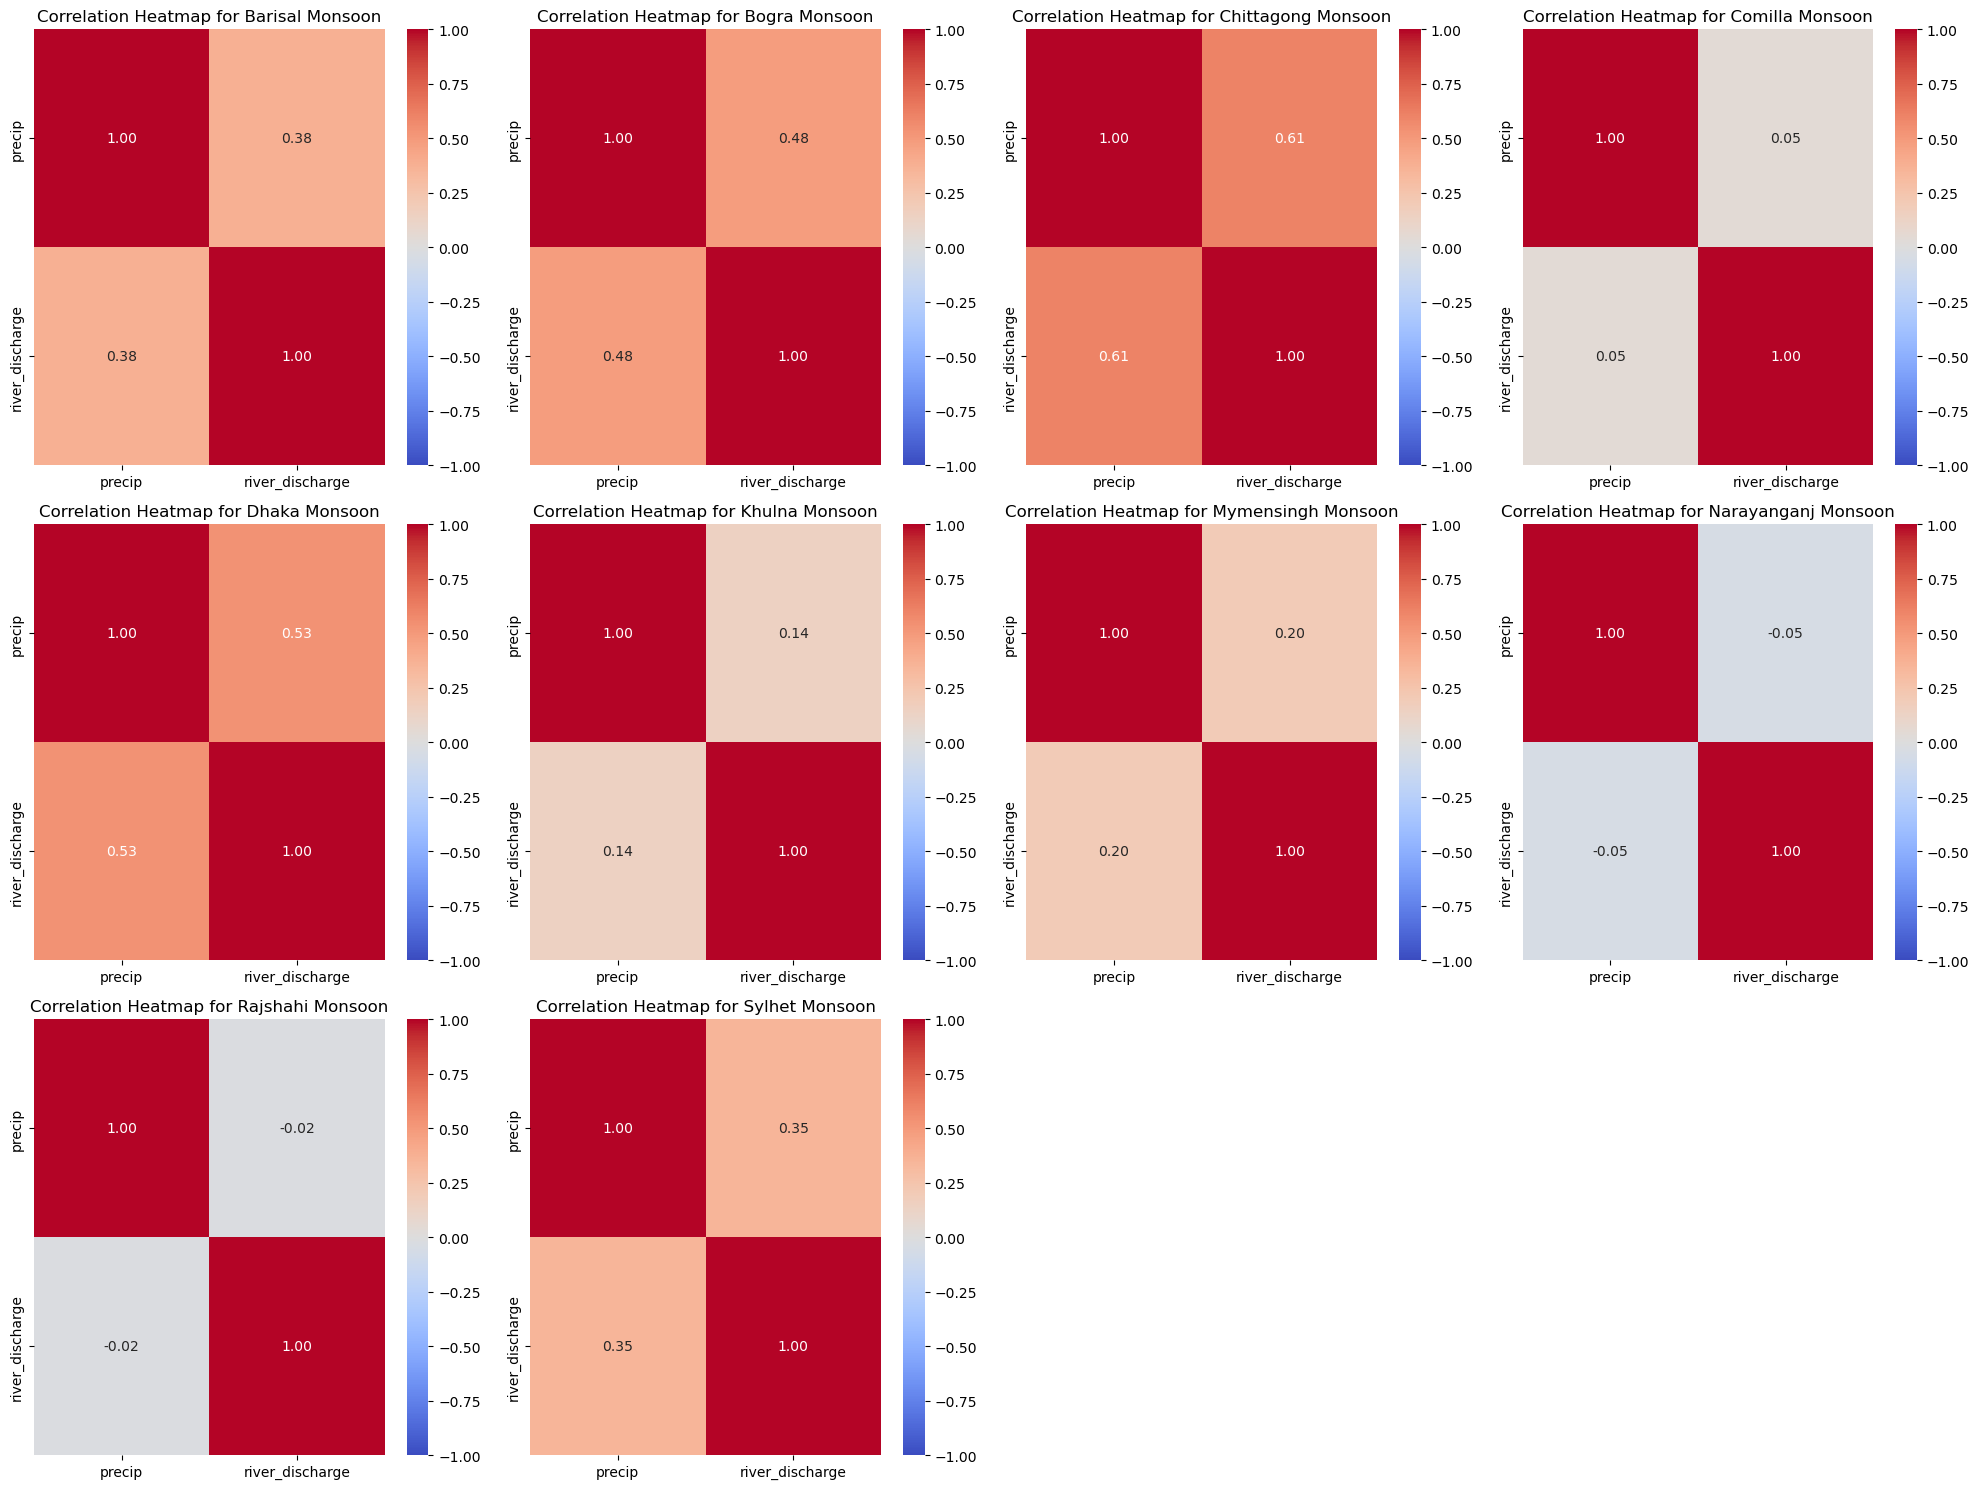

In [50]:
# Calculate the correlation matrix for each district during monsoon period
def plot_correlation_heatmap(dataframe, title, ax):
    # Calculate the correlation matrix
    corr_matrix = dataframe[['precip', 'river_discharge']].corr()

    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=ax)
    ax.set_title(title)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Generate correlation heatmaps for each district during monsoon period
plot_correlation_heatmap(df_barisal_monsoon, 'Correlation Heatmap for Barisal Monsoon', axes[0, 0])
plot_correlation_heatmap(df_bogra_monsoon, 'Correlation Heatmap for Bogra Monsoon', axes[0, 1])
plot_correlation_heatmap(df_chittagong_monsoon, 'Correlation Heatmap for Chittagong Monsoon', axes[0, 2])
plot_correlation_heatmap(df_comilla_monsoon, 'Correlation Heatmap for Comilla Monsoon', axes[0, 3])
plot_correlation_heatmap(df_dhaka_monsoon, 'Correlation Heatmap for Dhaka Monsoon', axes[1, 0])
plot_correlation_heatmap(df_khulna_monsoon, 'Correlation Heatmap for Khulna Monsoon', axes[1, 1])
plot_correlation_heatmap(df_mymensingh_monsoon, 'Correlation Heatmap for Mymensingh Monsoon', axes[1, 2])
plot_correlation_heatmap(df_naryanganj_monsoon, 'Correlation Heatmap for Narayanganj Monsoon', axes[1, 3])
plot_correlation_heatmap(df_rajshahi_monsoon, 'Correlation Heatmap for Rajshahi Monsoon', axes[2, 0])
plot_correlation_heatmap(df_sylhet_monsoon, 'Correlation Heatmap for Sylhet Monsoon', axes[2, 1])

# Remove empty subplots (if any)
fig.delaxes(axes[2, 2])
fig.delaxes(axes[2, 3])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Barisal decreases from 0.50 to 0.38.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Bogra decreases from 0.60 to 0.48.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Chittagong maintained at 0.61.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Comilla decreases from 0.14 to 0.05.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Dhaka decreases from 0.66 to 0.53.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Khulna decreases from 0.38 to 0.14.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Mymensingh decreases from 0.43 to 0.20.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Naryanganj decreases from 0.30 to -0.05.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Rajshahi decreases from 0.13 to -0.02.
- Compared to all periods, the correlation between 'precip' and 'river_discharge' in Monsoon period for Sylhet decreases from 0.48 to 0.35. 
<br>

- This could indicate that factors other than precipitation play a more significant role in determining river discharge during the Monsoon period in Naryanganj and Rajshahi. 
- Rajshahi is located in Bangladesh and is situated near the Padma River, which is one of the major rivers in the region. The Padma River, along with its tributaries, can significantly impact the river discharge in and around Rajshahi.
- Naryanganj is located near the confluence of several major rivers, including the Meghna River, the Shitalakshya River, and the Arial Khan River. These rivers, along with their tributaries and the overall hydrological network of the region, are likely to have a significant influence on the river discharge in Naryanganj.
